In [12]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from Vader_sentiment_anlayser import process_and_save

# Input paths
dashen_path = "../Data/Dashen_Bank_reviews_20250606_130804_cleaned.csv"
cbe_path = "../Data/Commercial_Bank_of_Ethiopia_reviews_20250606_130816_cleaned.csv"
boa_path = "../Data/Bank_of_Abyssinia_reviews_20250606_130818_cleaned.csv"

# Output paths
dashen_out = "../Data/Dashen_Bank_reviews_with_sentiment_vader.csv"
cbe_out = "../Data/CBE_reviews_with_sentiment_vader.csv"
boa_out = "../Data/BOA_reviews_with_sentiment_vader.csv"

# Run
process_and_save(dashen_path, dashen_out)
process_and_save(cbe_path, cbe_out)
process_and_save(boa_path, boa_out)


✅ Sentiment-enriched file saved to: ../Data/Dashen_Bank_reviews_with_sentiment_vader.csv
✅ Sentiment-enriched file saved to: ../Data/CBE_reviews_with_sentiment_vader.csv
✅ Sentiment-enriched file saved to: ../Data/BOA_reviews_with_sentiment_vader.csv


Visualization of out sentiment data

sentiment_label,negative,neutral,positive
bank,,,
Bank of Abyssinia,247,326,467
Commercial Bank of Ethiopia,482,1387,3047
Dashen Bank,24,94,329


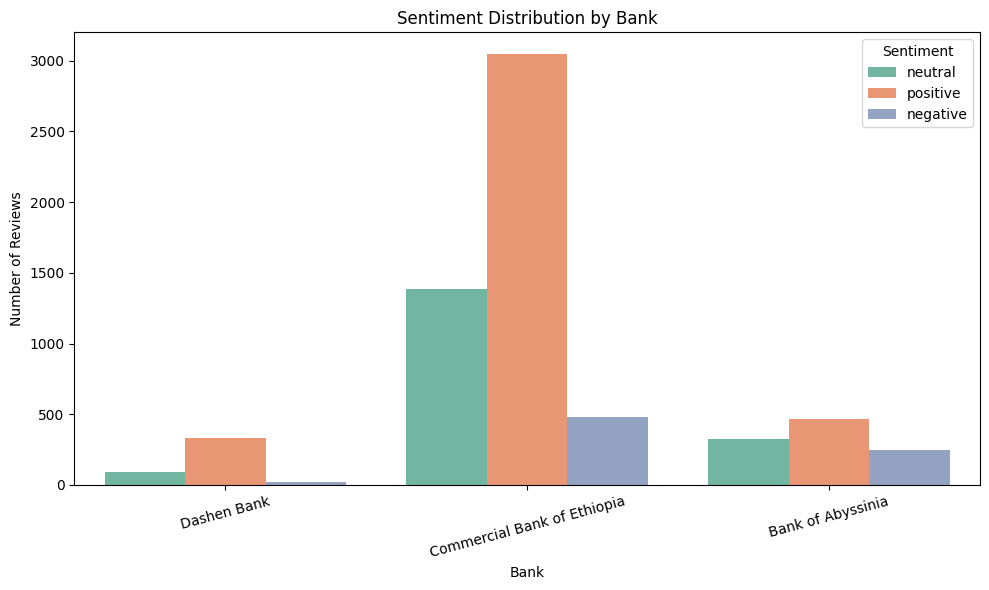

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load sentiment files
dashen_df = pd.read_csv(dashen_out)
cbe_df = pd.read_csv(cbe_out)
boa_df = pd.read_csv(boa_out)

# Add bank name for grouping
dashen_df["bank"] = "Dashen Bank"
cbe_df["bank"] = "Commercial Bank of Ethiopia"
boa_df["bank"] = "Bank of Abyssinia"

# Combine all
all_df = pd.concat([dashen_df, cbe_df, boa_df], ignore_index=True)

# ✅ TABLE: Sentiment distribution
sentiment_counts = all_df.groupby(["bank", "sentiment_label"]).size().reset_index(name="count")
sentiment_pivot = sentiment_counts.pivot(index="bank", columns="sentiment_label", values="count").fillna(0).astype(int)
display(sentiment_pivot)

# ✅ PLOT: Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=all_df, x="bank", hue="sentiment_label", palette="Set2")
plt.title("Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=15)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [7]:
import sys
import os

# Add the src directory to the path
sys.path.append(os.path.abspath("../src"))
from Textblob_sentiment_analyser import process_and_save

# Paths
dashen_path = "../Data/Dashen_Bank_reviews_20250606_130804_cleaned.csv"
cbe_path = "../Data/Commercial_Bank_of_Ethiopia_reviews_20250606_130816_cleaned.csv"
boa_path = "../Data/Bank_of_Abyssinia_reviews_20250606_130818_cleaned.csv"

dashen_out = "../Data/Dashen_Bank_reviews_with_sentiment_TextBlob.csv"
cbe_out = "../Data/CBE_reviews_with_sentiment_TextBlob.csv"
boa_out = "../Data/BOA_reviews_with_sentiment_TextBlob.csv"

# Process with TextBlob sentiment analysis
process_and_save(dashen_path, dashen_out)
process_and_save(cbe_path, cbe_out)
process_and_save(boa_path, boa_out)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✅ Sentiment-enriched file saved to: ../Data/Dashen_Bank_reviews_with_sentiment_TextBlob.csv
✅ Sentiment-enriched file saved to: ../Data/CBE_reviews_with_sentiment_TextBlob.csv
✅ Sentiment-enriched file saved to: ../Data/BOA_reviews_with_sentiment_TextBlob.csv


Vizualition for textblob

📋 Sentiment Distribution Table (TextBlob):


sentiment_label,negative,neutral,positive
bank,,,
Bank of Abyssinia,187,426,427
Commercial Bank of Ethiopia,278,1722,2916
Dashen Bank,23,109,315


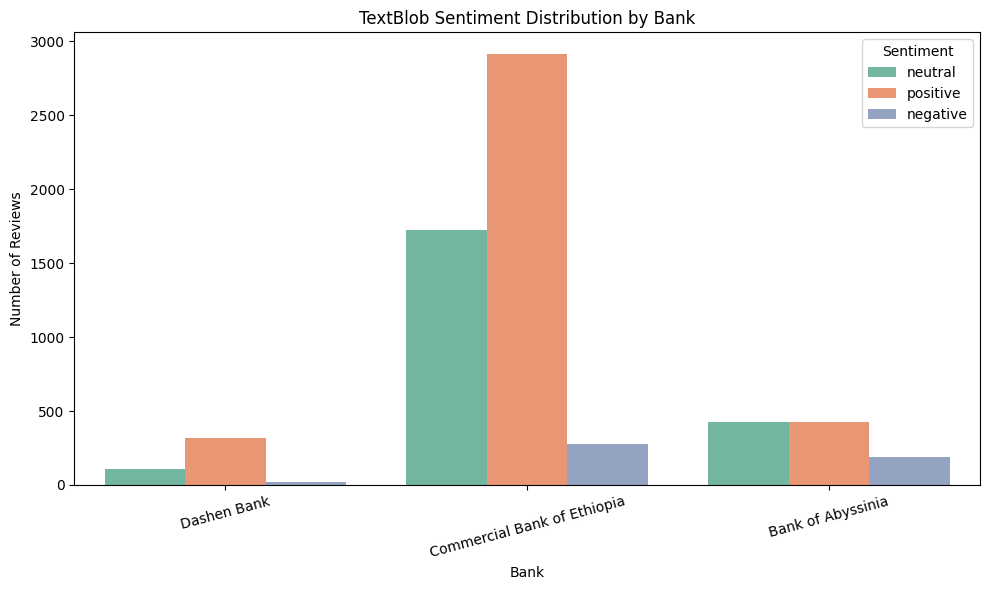

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ⚠️ Update these paths if needed — make sure they point to the TextBlob sentiment results
dashen_out = "../Data/Dashen_Bank_reviews_with_sentiment_TextBlob.csv"
cbe_out = "../Data/CBE_reviews_with_sentiment_TextBlob.csv"
boa_out = "../Data/BOA_reviews_with_sentiment_TextBlob.csv"

# Load sentiment-labeled review files
dashen_df = pd.read_csv(dashen_out)
cbe_df = pd.read_csv(cbe_out)
boa_df = pd.read_csv(boa_out)

# Add a column for the bank name
dashen_df["bank"] = "Dashen Bank"
cbe_df["bank"] = "Commercial Bank of Ethiopia"
boa_df["bank"] = "Bank of Abyssinia"

# Combine all three banks into one DataFrame
all_df = pd.concat([dashen_df, cbe_df, boa_df], ignore_index=True)

# ✅ TABLE: Sentiment distribution by bank
sentiment_counts = all_df.groupby(["bank", "sentiment_label"]).size().reset_index(name="count")
sentiment_pivot = sentiment_counts.pivot(index="bank", columns="sentiment_label", values="count").fillna(0).astype(int)

print("📋 Sentiment Distribution Table (TextBlob):")
display(sentiment_pivot)

# ✅ PLOT: Count of sentiment labels per bank
plt.figure(figsize=(10, 6))
sns.countplot(data=all_df, x="bank", hue="sentiment_label", palette="Set2")
plt.title("TextBlob Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=15)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


Distilbert

In [18]:
import sys
import os

# Add path to src folder
sys.path.append(os.path.abspath("../src"))

# Import your transformer sentiment module
from transformer_sentiment import process_and_save

# Input cleaned review files
dashen_path = "../Data/Dashen_Bank_reviews_20250606_130804_cleaned.csv"
cbe_path = "../Data/Commercial_Bank_of_Ethiopia_reviews_20250606_130816_cleaned.csv"
boa_path = "../Data/Bank_of_Abyssinia_reviews_20250606_130818_cleaned.csv"

# Output paths
dashen_out = "../Data/Dashen_Bank_reviews_with_sentiment_DistilBERT.csv"
cbe_out = "../Data/CBE_reviews_with_sentiment_DistilBERT.csv"
boa_out = "../Data/BOA_reviews_with_sentiment_DistilBERT.csv"

# Run sentiment analysis and save
process_and_save(dashen_path, dashen_out)
process_and_save(cbe_path, cbe_out)
process_and_save(boa_path, boa_out)


c:\Users\User\Desktop\Week_2\Customer-Experience-Analytics-for-Fin-tech-Apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Saved: ../Data/Dashen_Bank_reviews_with_sentiment_DistilBERT.csv
✅ Saved: ../Data/CBE_reviews_with_sentiment_DistilBERT.csv
✅ Saved: ../Data/BOA_reviews_with_sentiment_DistilBERT.csv


sentiment_label,negative,positive
bank,,
Bank of Abyssinia,597,443
Commercial Bank of Ethiopia,1649,3267
Dashen Bank,104,343


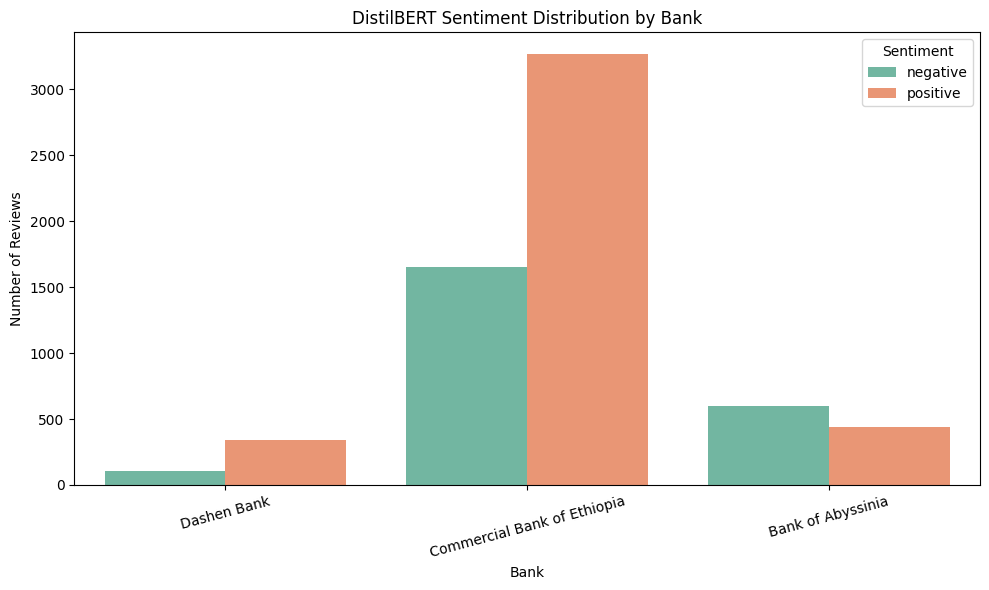

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load DistilBERT sentiment CSVs
dashen_df = pd.read_csv("../Data/Dashen_Bank_reviews_with_sentiment_DistilBERT.csv")
cbe_df = pd.read_csv("../Data/CBE_reviews_with_sentiment_DistilBERT.csv")
boa_df = pd.read_csv("../Data/BOA_reviews_with_sentiment_DistilBERT.csv")

# Add bank names for grouping
dashen_df["bank"] = "Dashen Bank"
cbe_df["bank"] = "Commercial Bank of Ethiopia"
boa_df["bank"] = "Bank of Abyssinia"

# Combine all into one DataFrame
all_df = pd.concat([dashen_df, cbe_df, boa_df], ignore_index=True)

# ✅ TABLE: Sentiment distribution by bank
sentiment_counts = all_df.groupby(["bank", "sentiment_label"]).size().reset_index(name="count")
sentiment_pivot = sentiment_counts.pivot(index="bank", columns="sentiment_label", values="count").fillna(0).astype(int)
display(sentiment_pivot)

# ✅ PLOT: Count of sentiment labels per bank
plt.figure(figsize=(10, 6))
sns.countplot(data=all_df, x="bank", hue="sentiment_label", palette="Set2")
plt.title("DistilBERT Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=15)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Load VADER results
dashen_vader = pd.read_csv("../Data/Dashen_Bank_reviews_with_sentiment_Vader.csv")
cbe_vader = pd.read_csv("../Data/CBE_reviews_with_sentiment_Vader.csv")
boa_vader = pd.read_csv("../Data/BOA_reviews_with_sentiment_Vader.csv")

for df in [dashen_vader, cbe_vader, boa_vader]:
    df["model"] = "VADER"
dashen_vader["bank"] = "Dashen Bank"
cbe_vader["bank"] = "Commercial Bank of Ethiopia"
boa_vader["bank"] = "Bank of Abyssinia"
vader_all = pd.concat([dashen_vader, cbe_vader, boa_vader])

# Load TextBlob results
dashen_textblob = pd.read_csv("../Data/Dashen_Bank_reviews_with_sentiment_TextBlob.csv")
cbe_textblob = pd.read_csv("../Data/CBE_reviews_with_sentiment_TextBlob.csv")
boa_textblob = pd.read_csv("../Data/BOA_reviews_with_sentiment_TextBlob.csv")

for df in [dashen_textblob, cbe_textblob, boa_textblob]:
    df["model"] = "TextBlob"
dashen_textblob["bank"] = "Dashen Bank"
cbe_textblob["bank"] = "Commercial Bank of Ethiopia"
boa_textblob["bank"] = "Bank of Abyssinia"
textblob_all = pd.concat([dashen_textblob, cbe_textblob, boa_textblob])

# Load DistilBERT results
dashen_bert = pd.read_csv("../Data/Dashen_Bank_reviews_with_sentiment_DistilBERT.csv")
cbe_bert = pd.read_csv("../Data/CBE_reviews_with_sentiment_DistilBERT.csv")
boa_bert = pd.read_csv("../Data/BOA_reviews_with_sentiment_DistilBERT.csv")

for df in [dashen_bert, cbe_bert, boa_bert]:
    df["model"] = "DistilBERT"
dashen_bert["bank"] = "Dashen Bank"
cbe_bert["bank"] = "Commercial Bank of Ethiopia"
boa_bert["bank"] = "Bank of Abyssinia"
bert_all = pd.concat([dashen_bert, cbe_bert, boa_bert])


In [21]:
# Combine everything
combined_all = pd.concat([vader_all, textblob_all, bert_all], ignore_index=True)


In [22]:
# Create pivot table of counts
sentiment_table = (
    combined_all.groupby(["model", "bank", "sentiment_label"])
    .size()
    .reset_index(name="count")
    .pivot_table(index=["model", "bank"], columns="sentiment_label", values="count", fill_value=0)
)

display(sentiment_table)


sentiment_label                         negative  neutral  positive
model      bank                                                    
DistilBERT Bank of Abyssinia               597.0      0.0     443.0
           Commercial Bank of Ethiopia    1649.0      0.0    3267.0
           Dashen Bank                     104.0      0.0     343.0
TextBlob   Bank of Abyssinia               187.0    426.0     427.0
           Commercial Bank of Ethiopia     278.0   1722.0    2916.0
           Dashen Bank                      23.0    109.0     315.0
VADER      Bank of Abyssinia               247.0    326.0     467.0
           Commercial Bank of Ethiopia     482.0   1387.0    3047.0
           Dashen Bank                      24.0     94.0     329.0

In [23]:
# Compute average sentiment score by bank and rating per model
avg_by_bank_rating = (
    combined_all
    .groupby(["bank", "rating", "model"])["sentiment_score"]
    .mean()
    .reset_index()
    .pivot_table(index=["bank", "rating"], columns="model", values="sentiment_score")
    .round(3)
)

display(avg_by_bank_rating)


model                               DistilBERT  TextBlob  VADER
bank                        rating                             
Bank of Abyssinia           1            0.976    -0.121 -0.171
                            2            0.959    -0.008 -0.046
                            3            0.968     0.123  0.160
                            4            0.974     0.356  0.297
                            5            0.962     0.432  0.365
Commercial Bank of Ethiopia 1            0.979    -0.019 -0.081
                            2            0.967     0.111  0.015
                            3            0.964     0.248  0.186
                            4            0.965     0.393  0.334
                            5            0.969     0.445  0.376
Dashen Bank                 1            0.995     0.001 -0.021
                            2            0.960    -0.013 -0.086
                            3            0.997     0.205  0.304
                            4            0.975     0.337  0.312
                            5            0.986     0.437  0.532

✅ Interpretation:
Higher ratings (4–5 stars) are generally associated with higher sentiment scores across all models — confirming alignment between user ratings and sentiment polarity.

DistilBERT scores are consistently high (above 0.95), indicating it may be more sensitive to positive sentiment or less nuanced for negative tone in this domain.

TextBlob and VADER show more variance, especially for low ratings:

Example: For 1-star reviews, VADER and TextBlob often return negative sentiment (e.g., -0.17, -0.12), while DistilBERT still gives a high score (e.g., 0.976).

This suggests that DistilBERT may be overestimating positivity or isn't well-calibrated for local language nuances or app-specific complaints.

Bank comparison:

Dashen Bank shows slightly higher positive sentiment scores at 5-star ratings across all models.

Negative ratings (1–2 stars) are best captured by TextBlob and VADER, where scores are more negative than those of DistilBERT.